In [28]:
#installing, importing and settings

!pip install preprocess
!pip install python_speech_features
!pip install IPython

import os
import IPython.display as ipd
import librosa.display
from os import listdir
from os.path import isdir, join
import librosa
import random
import tensorflow as tf
from tensorflow.python.ops import ragged
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
from pathlib import Path
import shutil
import errno

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=e83f5ad84c48b41299e4bc439e9a8b7d1214291a4048bfeb8c65568bc70df403
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [29]:
#withdrawing the dataset

"""!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d dogukankaggle/deneme
!kaggle datasets download -d dogukankaggle/fruit-bat-dataset
!unzip fruit-bat-dataset.zip"""


#withdrawing the dataset
%rm -r /content/sample_data
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

#!kaggle datasets download -d akoluacik/fruitbat12
#!unzip fruitbat12.zip

!kaggle datasets download -d akoluacik/fruitbatdataset
!unzip fruitbatdataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: 3-6/6/120717051904486803.WAV  
  inflating: 3-6/6/120717135219081844.WAV  
  inflating: 3-6/6/120717135246899847.WAV  
  inflating: 3-6/6/120717140320807856.WAV  
  inflating: 3-6/6/120717171554516879.WAV  
  inflating: 3-6/6/120717184517768983.WAV  
  inflating: 3-6/6/120717184538219988.WAV  
  inflating: 3-6/6/120717184541583989.WAV  
  inflating: 3-6/6/120717222720777013.WAV  
  inflating: 3-6/6/120717222824492390.WAV  
  inflating: 3-6/6/120717222834590021.WAV  
  inflating: 3-6/6/120717230320299042.WAV  
  inflating: 3-6/6/120719013207452575.WAV  
  inflating: 3-6/6/120719031623553509.WAV  
  inflating: 3-6/6/120719031636850511.WAV  
  inflating: 3-6/6/120719032437039517.WAV  
  inflating: 3-6/6/120719035909791539.WAV  
  inflating: 3-6/6/120719040338018560.WAV  
  inflating: 3-6/6/120719073934428107.WAV  
  inflating: 3-6/6/120719200053652868.WAV  
  inflating: 3-6/6/120719203123650494.WAV  
  inflating: 3-6/6/120719

In [167]:
def copy_folder(src, dst, symlinks=False, ignore=None):
  for item in os.listdir(src):
    s = os.path.join(src, item)
    d = os.path.join(dst, item)
    if os.path.isdir(s):
      shutil.copytree(s,d,symlinks,ignore)
      #print("if ", s, d)
    else:
      shutil.copy2(s,d)
      #print("else ", s, d)

In [ ]:
# You are good if you'd like to remove the contexts that you didn't download
# Run second cell for 12vsall
DOWNLOADED_CONTEXTS=[
                     ["2", "4", "9"],
                     ["3","6"],
                     ["11"],
                     ["12"]
]
SOURCE_CONTEXTS = ["2", "6"]
TARGET_DIRECTORY = "/content/" + "-".join(SOURCE_CONTEXTS)
try:
  os.makedirs(TARGET_DIRECTORY)
except OSError as exc:
  if exc.errno == errno.EEXIST:
    print("File was already created. Skipping this part...")
finally:
  for downloaded_contexts in DOWNLOADED_CONTEXTS:
    for Context in downloaded_contexts:
      for context in SOURCE_CONTEXTS:
        if context == Context:
          source_directory = os.path.join("/content", "-".join(downloaded_contexts), context)
          print("source_directory:", source_directory, "TARGET_DIRECTORY:", TARGET_DIRECTORY + "/" + context)
          if os.path.exists(os.path.join(TARGET_DIRECTORY, context)) == False:
            os.makedirs(os.path.join(TARGET_DIRECTORY, context))
          copy_folder(source_directory, os.path.join(TARGET_DIRECTORY, context))
          break

In [202]:
dirs = [dir for dir in os.listdir("/content") if os.path.isdir(dir)]
TARGET_DIRECTORY = "/content/12vsall"
os.makedirs(os.path.join(TARGET_DIRECTORY, "2"))
os.makedirs(os.path.join(TARGET_DIRECTORY, "all"))
for dir in dirs:
  if "".join((dir.split("-"))).isnumeric():
    for context in dir.split("-"):
      source_directory = os.path.join("/content", dir, context)
      target_directory = os.path.join(TARGET_DIRECTORY, "2" if context == "2" else "all")
      print(f"context:{context}")
      if dir != "2":
        print(f"Source Directory:{source_directory}, target_directory:{target_directory}")
        copy_folder(source_directory, target_directory )
      else:
        print(f"Source Directory:{source_directory}, target_directory:{target_directory}")
        copy_folder(source_directory, target_directory )
print(f"Length of target_directory:{len(os.listdir(target_directory))}")


context:3
Source Directory:/content/3-6/3, target_directory:/content/12vsall/all
context:6
Source Directory:/content/3-6/6, target_directory:/content/12vsall/all
context:2
Source Directory:/content/2-4-9/2, target_directory:/content/12vsall/2
context:4
Source Directory:/content/2-4-9/4, target_directory:/content/12vsall/all
context:9
Source Directory:/content/2-4-9/9, target_directory:/content/12vsall/all
Length of target_directory:5999


In [201]:
!rm -r 12vsall

rm: cannot remove '12vsall': No such file or directory


In [140]:
print(files)

['.config', '3-6', '2-4-9', '.ipynb_checkpoints']


In [97]:
print(len(os.listdir("/content/2-6/2")))

1753


In [ ]:
# save RAM
del DOWNLOADED_CONTEXTS
del TARGET_DIRECTORY
del source_directory

In [233]:
#all = ["3", "4", "6", "9"]
CONTEXTS = [
            ["4", "9"], 
            ["2", "9"], 
            ["3", "9"], 
            ["2", "4"], 
            ["2", "6"], 
            ["2", "3"], 
            ["2", "3", "4"], 
            ["2", "3", "4", "6"], 
            ["2", "3", "4", "6", "9"], 
            ["2", "all"], 
            ["2", "3", "4", "6", "9", "12"]
          ]
index = 9 # DEFINE index TO REACH ONE OF THE CONTEXT COMBINATIONS ABOVE
DIRECTORY = "/content/" + ("-".join(CONTEXTS[index]) if index != 9 else "2vsall")
contexts = CONTEXTS[index]
JSON_PATH = "/content/12vsall.json" # Name your json file
DATA_PATH = JSON_PATH
SAMPLE_RATE = 250000
TRACK_DURATION = 1.5 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
print(f"DIRECTORY:{DIRECTORY}, contexts:{contexts}")


DIRECTORY:/content/2vsall, contexts:['2', 'all']


In [224]:
from scipy.io import wavfile
import scipy
import os
import wave
import contextlib

def get_duration(wav_file:str):
  with contextlib.closing(wave.open(wav_file,'r')) as f:
      frames = f.getnframes()
      rate = f.getframerate()
      duration = frames / float(rate)
      return duration
      print(duration)

def walk(directory:str, t:float):
  
  files = {} # holds the files whose duration more than t sec.
  removed_files = {}
  for context in contexts:
    print(context)
    files[context] = os.listdir(os.path.join(directory, context))
  
  for context, records in files.items():
    path = os.path.join(directory, context)
    print(path)
    if context not in removed_files:
      removed_files[context] = []
    for record in records:
      record_path = os.path.join(path,record)
      duration = get_duration(record_path)
      if duration < t:
        data = {record:duration}
        removed_files[context].append(data)

  return removed_files

if __name__ == "__main__":
  
  files = walk(DIRECTORY , 1)
  for context, values in files.items():
    for value in values:
      print(context, value)

Streaming output truncated to the last 5000 lines.
2 {'130504151107512888.WAV': 1.314112}
2 {'121025150727004796.WAV': 1.281344}
2 {'130221061516456719.WAV': 1.609024}
2 {'130210120829437213.WAV': 1.281344}
2 {'130328154044053432.WAV': 1.34688}
2 {'130530132833548949.WAV': 1.379648}
2 {'130110050940689667.WAV': 1.314112}
2 {'130312162454668065.WAV': 1.314112}
2 {'130313220457998958.WAV': 1.281344}
2 {'130604061107192497.WAV': 1.314112}
2 {'130527112204360611.WAV': 2.035008}
2 {'130424152818031288.WAV': 1.314112}
2 {'130421180821603559.WAV': 2.067776}
2 {'130305054646275818.WAV': 2.035008}
2 {'130305172952788035.WAV': 2.886976}
2 {'130323123624705009.WAV': 1.314112}
2 {'130411064932556631.WAV': 1.281344}
2 {'130308165732423974.WAV': 1.314112}
2 {'130604175326176745.WAV': 1.314112}
2 {'130527070015292393.WAV': 1.8384}
2 {'130404154213064857.WAV': 1.51072}
2 {'121014141657994929.WAV': 1.67456}
2 {'130405112014048723.WAV': 1.314112}
2 {'130228132412224218.WAV': 1.34688}
2 {'130119051150630

In [ ]:
# removing files from workspace

!rm -r /content/fruitbat12.zip
#!rm -r /content/3-9_mfcc_fixed.json

#!cp -r /content/2-4-9/2 /content/3-6/
#!cp -r /content/3-6/3 /content/2-4-9

#!cp -r /content/4-9_mfcc_UNfixed.json /content/drive/MyDrive/GraduateProject/JSON_files/

In [225]:
# eliminating undesired files

import os

def eliminate_others():
  record_dict = {}
  
  for context in contexts:
    record_dict[context] = os.listdir(os.path.join(DIRECTORY, context))

  for keys, values in record_dict.items():
    print(f"Context:{keys} -> [{values[:5]}], len:{len(values)}")
  
  with open("/content/unwanted_filenames.txt", "r") as f:
    eliminated_files = f.read()
  
  eliminated_files = eliminated_files.split("\n")
  
  for context,records in record_dict.items():
    for record in records:
      for ef in eliminated_files:
        if record == ef:
          print(f"{record} in the {context} is  being removed!")
          os.remove(os.path.join(DIRECTORY, context, record))
          break
  
  print("Lengths after operations")
  for context in files:
    print(f"Context:{context}, len:{len(os.listdir(os.path.join(DIRECTORY, context)))}")

#len1, files, len2 = eliminate_others()
eliminate_others()
#print(len1 == len2)



      

Context:2 -> [['130218024944955454.WAV', '130312074652933952.WAV', '130224151003738002.WAV', '130403130241055124.WAV', '130413072000367272.WAV']], len:1501
Context:all -> [['121202215250486605.WAV', '130530193315129160.WAV', '121026230833019583.WAV', '130521044526833890.WAV', '130202172503483332.WAV']], len:5999


FileNotFoundError: ignored

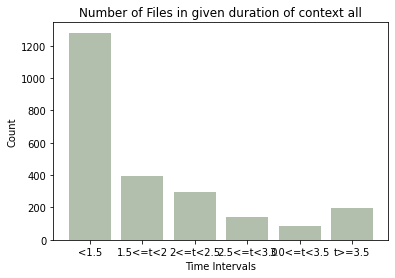

[1.477952, 1.969472, 2.49376, 2.98528, 3.4768, 47.779136]
[1281, 396, 295, 144, 85, 199]


In [235]:
# plotting the histograms

durations = [0]*6 # Keeps the duration related to index, (i.e., number of records whose durations are < 1 is kept at index 0)
max_durations = [0] * 6 # Keeps the max duration of each interval

def get_duration(wav_file:str):
  with contextlib.closing(wave.open(wav_file,'r')) as f:
      frames = f.getnframes()
      rate = f.getframerate()
      duration = frames / float(rate)
      return duration

def walk(record:str): # recordların sürelerinin hangi aralıkta olduğunu bulan fonksiyon, aralık değiştirmek için if'lerin sınırlarını değiştir
  
  duration = get_duration(record)
  if  duration < 1.5:
    #time_dict["a"].append(record)
    durations[0] += 1
    if(duration > max_durations[0]): #maksimum süre belirlenmesi
      max_durations[0] = duration
  elif 1.5 <= duration < 2.0:
    #time_dict["b"].append(record)
    durations[1] += 1
    if(duration > max_durations[1]):
      max_durations[1] = duration
  elif 2.0 <= duration < 2.5:
    #time_dict["c"].append(record)
    durations[2] += 1
    if(duration > max_durations[2]):
      max_durations[2] = duration
  elif 2.5 <= duration < 3.0:
    durations[3] += 1
    #time_dict["d"].append(record)
    if(duration > max_durations[3]):
      max_durations[3] = duration
  elif 3.0 <= duration < 3.5:
    durations[4] += 1
    #time_dict["e"].append(record)
    if(duration > max_durations[4]):
      max_durations[4] = duration
  else:
    #time_dict["f"].append(record)
    durations[5] += 1
    if(duration > max_durations[5]):
      max_durations[5] = duration

def plot_hist(context):

  data = durations
  y = range(len(durations))
  LABELS = ["<1.5", "1.5<=t<2", "2<=t<2.5", "2.5<=t<3.0", "3.0<=t<3.5", "t>=3.5"] # Eğer yukarıda if'lerin sınırlarını değiştirirsen burayı da değiştir
  plt.bar(y, data, color = "#B1BFAC")
  plt.xticks(y, LABELS)
  plt.xlabel('Time Intervals')
  plt.ylabel('Count')
  plt.title(f"Number of Files in given duration of context {context}")
  plt.show()

def main():
  for context in contexts:
    for record in os.listdir(os.path.join(DIRECTORY, context)):
      path = os.path.join(DIRECTORY, context, record)
      walk(path)
  plot_hist(contexts[-1])
  print(max_durations)
  print(durations)

if __name__ == "__main__":
  main()
  


In [228]:
# balancing the dataset for CNN
# shuffles classes and deleted

import random

for context in contexts:
  x = os.listdir(os.path.join(DIRECTORY, context))
  print(x)
  random.shuffle(x)
  print(x)
  for j,File in enumerate(os.listdir(os.path.join(DIRECTORY, context))):
    print(File)
    for k in range(len(x)-1200):
      if File == x[k+1200]:
        print(f"{j},{File} siliniyor")
        os.remove(os.path.join(DIRECTORY, context, File))


Streaming output truncated to the last 5000 lines.
120820022533765098.WAV
121126120605194612.WAV
3218,121126120605194612.WAV siliniyor
120604195837053804.WAV
3219,120604195837053804.WAV siliniyor
120802200255553447.WAV
3220,120802200255553447.WAV siliniyor
121002045442033881.WAV
3221,121002045442033881.WAV siliniyor
120627053545995901.WAV
3222,120627053545995901.WAV siliniyor
121209225906158421.WAV
3223,121209225906158421.WAV siliniyor
130228192530092166.WAV
130316124016741890.WAV
3225,130316124016741890.WAV siliniyor
130312192155823744.WAV
3226,130312192155823744.WAV siliniyor
121122180025099626.WAV
121002033308119772.WAV
3228,121002033308119772.WAV siliniyor
130315121847787087.WAV
3229,130315121847787087.WAV siliniyor
130409205925968900.WAV
3230,130409205925968900.WAV siliniyor
121004042945982089.WAV
3231,121004042945982089.WAV siliniyor
120727232828943139.WAV
130407065346307525.WAV
3233,130407065346307525.WAV siliniyor
130102205354831665.WAV
3234,130102205354831665.WAV siliniyor
130

In [184]:
# balancing the dataset for LSTM Models
# in each folder, there will be about 1500 files whose duration is less than 2.5 seconds.

from scipy.io import wavfile
import scipy
import contextlib
import wave

SAMPLE_RATE = 2500000


for context in contexts:
  records = os.listdir(os.path.join(DIRECTORY, context))
  random.shuffle(records)
  for k, record in enumerate(records):
    if k > 5000:
      os.remove(os.path.join(DIRECTORY, context, record))
      print(f"{record} is being deleted!")

121122012359714153.WAV is being deleted!
121214230003538816.WAV is being deleted!
130221193153134979.WAV is being deleted!
121219050335515439.WAV is being deleted!
120807224658529328.WAV is being deleted!
121120214323408469.WAV is being deleted!
121117195412252490.WAV is being deleted!
121121215444249882.WAV is being deleted!
120721230710730772.WAV is being deleted!
121205021441460726.WAV is being deleted!
121215180513385414.WAV is being deleted!
121118122535628106.WAV is being deleted!
121019132447371464.WAV is being deleted!
120731001527531262.WAV is being deleted!
121204020548555859.WAV is being deleted!
121121005222221212.WAV is being deleted!
121121043145340980.WAV is being deleted!
121206233706194917.WAV is being deleted!
121202214201049492.WAV is being deleted!
121121223642773299.WAV is being deleted!
121114195241434653.WAV is being deleted!
121125232102642319.WAV is being deleted!
120625194246756674.WAV is being deleted!
120729012018478979.WAV is being deleted!
1207270541475738

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


[Text(0, 0.5, 'MFCC Values')]

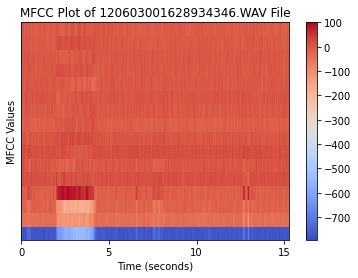

In [ ]:
signal, sr = librosa.load("/content/120603001628934346.WAV", sr=250000)
mfcc = librosa.feature.mfcc(signal, sr, n_mfcc=16, n_fft=2048, hop_length=512)

fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC Plot of 120603001628934346.WAV File')
ax.set(xlabel='Time (seconds)')
ax.set(ylabel='MFCC Values')



In [234]:
# obtaining json file with UNFIXED sized records

def get_duration(wav_file:str):
  
  if wav_file.endswith(".WAV") == False:
    print(f"File must have WAV extension, got {wav_file[-3:]}")
    return
  _, data = wavfile.read(wav_file)
  t = len(data) / SAMPLE_RATE
  return t

def save_mfcc(dataset_path, json_path, num_mfcc=16, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """
    print(json_path)
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:
                
                # load audio file
                file_path = os.path.join(dirpath, f)

                # Get duration, adjust sample_per_track, samples_per_segment, num_mfcc_vectors_per_segment
                track_duration = get_duration(file_path)

                sample_per_track = track_duration * SAMPLE_RATE
                #print(f"sample_per_track: {sample_per_track} for record {f} with duration {track_duration}")
                
                samples_per_segment = int(sample_per_track / num_segments)
                num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
                
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                
                for d in range(num_segments):
                  start = samples_per_segment * d
                  finish = start + samples_per_segment
                  
                  # extract mfcc
                  mfcc = librosa.feature.mfcc(signal[start:finish], sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                  mfcc = mfcc.T

                  if len(mfcc) == num_mfcc_vectors_per_segment:  
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(i-1)
                    print("{}, segment:{}".format(file_path, d+1))
        
    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
    
        
if __name__ == "__main__":
    save_mfcc(DIRECTORY, JSON_PATH, num_segments = 1)
    


/content/12vsall.json

Processing: all


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: WavFileWarning: Chunk (non-data) not understood, skipping it.
/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


/content/2vsall/all/130202172503483332.WAV, segment:1
/content/2vsall/all/121227193543954109.WAV, segment:1
/content/2vsall/all/121014174453842965.WAV, segment:1
/content/2vsall/all/121103205236718371.WAV, segment:1
/content/2vsall/all/121213032811444305.WAV, segment:1
/content/2vsall/all/120609032223163730.WAV, segment:1
/content/2vsall/all/130408194439605441.WAV, segment:1
/content/2vsall/all/120706050134002418.WAV, segment:1
/content/2vsall/all/130402054120363919.WAV, segment:1
/content/2vsall/all/130528054919125851.WAV, segment:1
/content/2vsall/all/121219224835134908.WAV, segment:1
/content/2vsall/all/121030041359591907.WAV, segment:1
/content/2vsall/all/120801042723251319.WAV, segment:1
/content/2vsall/all/120709131724226792.WAV, segment:1
/content/2vsall/all/121106015011077091.WAV, segment:1
/content/2vsall/all/130427061947314507.WAV, segment:1
/content/2vsall/all/130202133636652164.WAV, segment:1
/content/2vsall/all/130413193409037433.WAV, segment:1
/content/2vsall/all/13040720

KeyboardInterrupt: ignored

In [ ]:
# FOR CNN obtaining the json file with fixed records  FOR CNN 


import json
import os
import math
import librosa

#DATASET_PATH = "/content/2-4-9" #buranın devamını sen getir
JSON_PATH = "/content/12_vs_all_mfcc_fixed.json" # burayı da sen getir
SAMPLE_RATE = 250000
TRACK_DURATION = 1 # measured in seconds # ben bura ile oynaya oynaya bunu buldum bunu yükseltirsek hoş olabilir #0.02 de hata veriyor galiba
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=16, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        print(f"i:{i}, dirnames:{dirnames}")
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            print(f"semantic_label:{semantic_label}")
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())           
                        data["labels"].append(i-1)
                        #print(f"labels:{labels}")
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
save_mfcc(DIRECTORY, JSON_PATH, num_segments=1)


In [ ]:
# FOR LSTM obtaining the json file with fixed records FOR LSTM

def save_mfcc(dataset_path, json_path, num_mfcc=16, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        print(f"i:{i}, dirnames:{dirnames}")
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            print(f"semantic_label:{semantic_label}")
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                difference = SAMPLES_PER_TRACK - len(signal)
                signal = np.concatenate([signal, np.zeros(int(difference))])
                
                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())           
                        data["labels"].append(i-1)
                        #print(f"labels:{labels}")
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=1)


i:0, dirnames:['4', '2']
i:1, dirnames:[]
semantic_label:4

Processing: 4
/content/2-4-9/4/121210033917300585.WAV, segment:1
/content/2-4-9/4/130508020425476215.WAV, segment:1
/content/2-4-9/4/121026230648595561.WAV, segment:1

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "



/content/2-4-9/4/130307063430543373.WAV, segment:1
/content/2-4-9/4/121006041225135952.WAV, segment:1
/content/2-4-9/4/130208103516543999.WAV, segment:1
/content/2-4-9/4/121107022021323806.WAV, segment:1
/content/2-4-9/4/130419160836604401.WAV, segment:1
/content/2-4-9/4/121204005805863113.WAV, segment:1
/content/2-4-9/4/121212041434262929.WAV, segment:1
/content/2-4-9/4/130315111019441763.WAV, segment:1
/content/2-4-9/4/121207035220196659.WAV, segment:1
/content/2-4-9/4/130115052700750952.WAV, segment:1
/content/2-4-9/4/130119134558248882.WAV, segment:1
/content/2-4-9/4/120717185532914912.WAV, segment:1
/content/2-4-9/4/130508022428884236.WAV, segment:1
/content/2-4-9/4/130420043616984265.WAV, segment:1
/content/2-4-9/4/121113014117884111.WAV, segment:1
/content/2-4-9/4/121204174827316198.WAV, segment:1
/content/2-4-9/4/130508083230436308.WAV, segment:1
/content/2-4-9/4/130223114006374292.WAV, segment:1
/content/2-4-9/4/121202051906175542.WAV, segment:1
/content/2-4-9/4/1210020509395

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 64)          20736     
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 6)                 774       
                                                                 
Total params: 136,838
Trainable params: 136,838
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
226/226 [============================

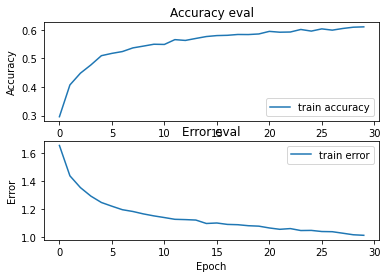

57/57 - 30s - loss: 1.0690 - accuracy: 0.5888 - 30s/epoch - 524ms/step

Test accuracy: 0.588790237903595


INFO:tensorflow:Assets written to: /content/LSTM_model/assets


INFO:tensorflow:Assets written to: /content/LSTM_model/assets


In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    #axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    #axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    #return X_train, X_validation, X_test, y_train, y_validation, y_test
    return X_train, X_test, y_train, y_test

def build_model(): # input_shape was the parameter
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    model = keras.Sequential()
    model.add(keras.layers.Input(shape=[None,16],dtype=tf.float32,ragged=True))

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape = (None,16), return_sequences = True))
    model.add(keras.layers.LSTM(128))

    # dense layer
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(6, activation='softmax')) # BURAYA ÇOK ÇOK DİKKAT!!!!

    return model

    """ # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(128))

    # dense layer
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(4, activation='softmax')) # BURAYA ÇOK ÇOK DİKKAT!!!!

    return model
    """

if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_test, y_train, y_test = prepare_datasets(0.2)

    # create network
    #input_shape = [X_train.shape[1], X_train.shape[2]]
    #model = build_model(input_shape)

    model = build_model()

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    #history = model.fit(X_train, y_train, batch_size=32, epochs=30)

    r_train_x = tf.ragged.constant(X_train)
    r_test_x = tf.ragged.constant(X_test)

    history = model.fit(r_train_x, y_train, batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(r_test_x, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    model.save("/content/LSTM_model")

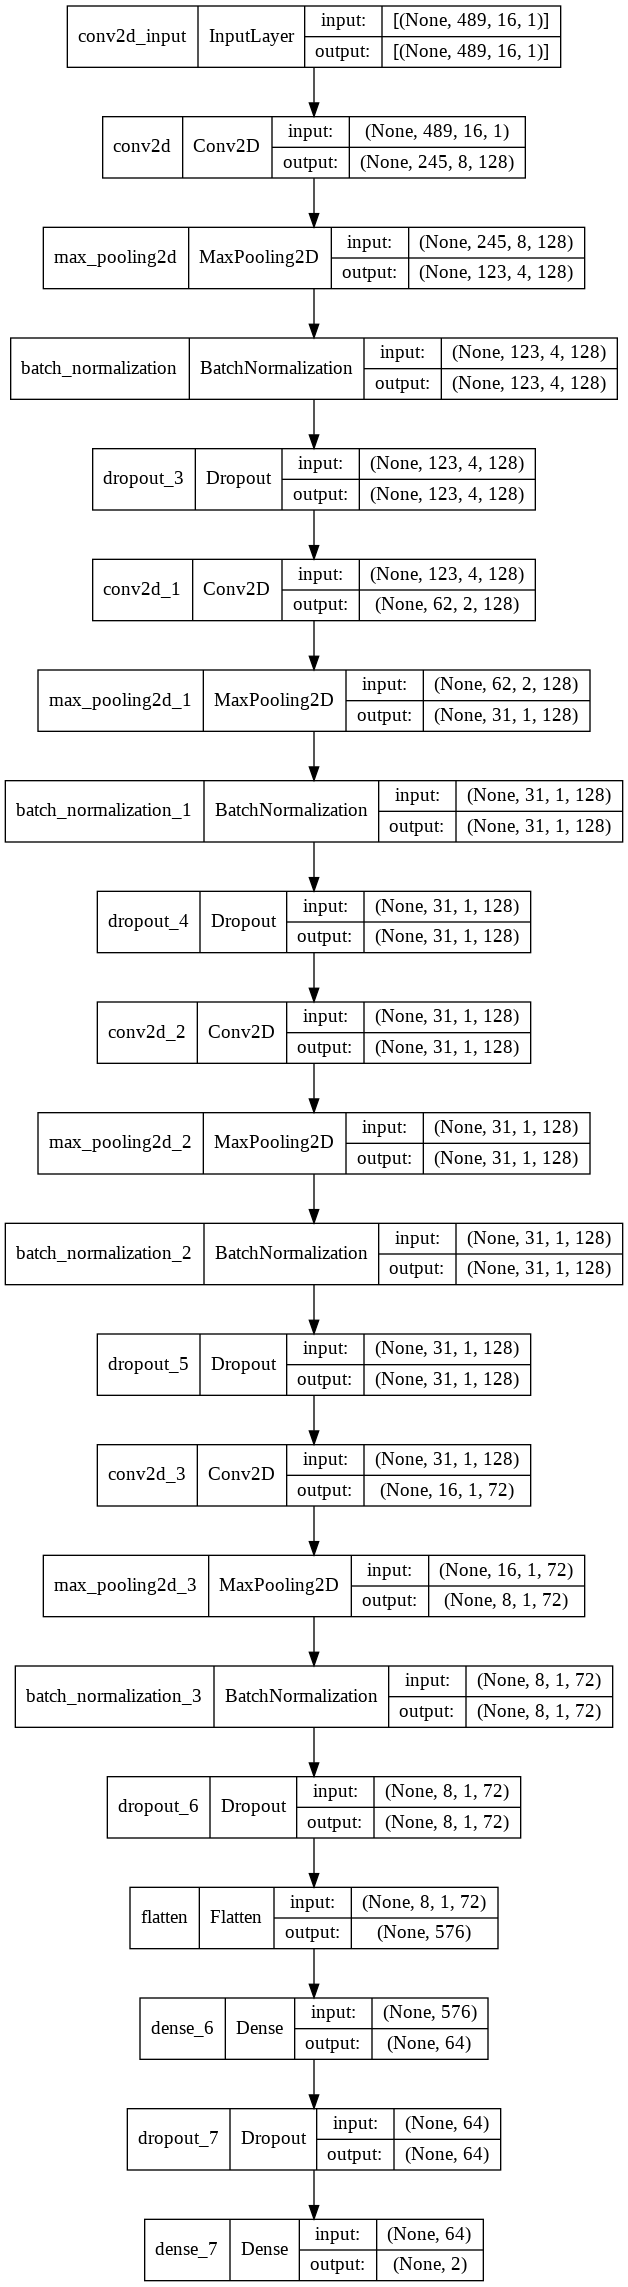

In [ ]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), strides = (2, 2), activation='relu', padding='same', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # 2nd conv layer
    model.add(keras.layers.Conv2D(128, (5, 5), strides = (2, 2) , activation='relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # 4th conv layer
    model.add(keras.layers.Conv2D(72, (3, 3), strides = (2, 2), activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D((3,3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.15))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model

input_shape = [489,16,1]

model = build_model(input_shape) 

dot_img_file = '/content/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)



In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    print(input_shape)
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape = (input_shape[1], input_shape[2]), return_sequences=True, activation='relu'))
    model.add(keras.layers.LSTM(64))

    # Dense Layer
    model.add(keras.layers.Dense(128,activation = 'relu'))
    model.add(keras.layers.Dropout(0.5))

    # Output Layer
    model.add(keras.layers.Dense(2, activation = 'softmax')) # BURAYA ÇOK ÇOK DİKKAT!!!
    return model

def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    # print("Target: {}, Predicted label: {}".format(y, predicted_index))
    print(f"Target: {y}, Predicted label: {predicted_index}")


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.2)

    # create network
    #input_shape = (X_train.shape[1], X_train.shape[2]) # 1, 16
    input_shape = X_train.shape
    print(input_shape)
    
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    model.save("/content/LSTM_model")

labels:{0, 1}
489 16
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 245, 8, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 4, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 123, 4, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 123, 4, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 2, 128)        409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None

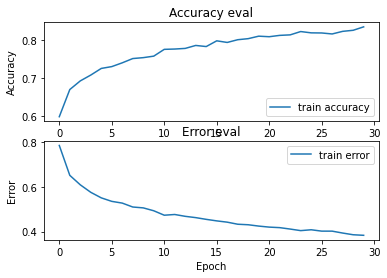

75/75 - 7s - loss: 0.4265 - accuracy: 0.8104 - 7s/epoch - 95ms/step

Test accuracy: 0.8104166388511658
Target: 1, Predicted label: [1]
INFO:tensorflow:Assets written to: /content/CNN_model/assets


In [ ]:
# CNN Model without validation
# dense layerın sayısına dikkat et
# json path'ine dikkat et


import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

#DATA_PATH = "/content/12_vs_all_mfcc_fixed.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print(f"labels:{set(y)}")
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    #axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    #axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
 

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    #X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_test, y_train, y_test


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), strides = (2, 2), activation='relu', padding='same', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # 2nd conv layer
    model.add(keras.layers.Conv2D(128, (5, 5), strides = (2, 2) , activation='relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # 4th conv layer
    model.add(keras.layers.Conv2D(72, (3, 3), strides = (2, 2), activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D((3,3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(.3))

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.15))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_test, y_train, y_test = prepare_datasets(0.2)

    print(X_train.shape[1], X_train.shape[2])

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[len(X_test) - 1]
    y_to_predict = y_test[len(y_test) - 1]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

    model.save("/content/CNN_model")

In [ ]:
#CNN Model with validation
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax')) # buraya çok dikkat

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 487, 14, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 244, 7, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 244, 7, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 244, 7, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 242, 5, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 121, 3, 32)      

KeyboardInterrupt: ignored

In [ ]:
 model.save("/content/CNN_model")

INFO:tensorflow:Assets written to: /content/CNN_model/assets


INFO:tensorflow:Assets written to: /content/CNN_model/assets
